In [36]:
import pandas as pd


📌 1. Cleaning data là gì?
Là bước làm sạch dữ liệu gốc để đảm bảo rằng các giá trị đầu vào:

Không bị thiếu (missing/null).

Không sai kiểu (data type mismatch).

Không có giá trị bất thường (extreme outliers).

Không bị trùng lặp (duplicates).

Các cột được đặt tên đúng và không bị split hoặc gộp lỗi.

In [37]:
df = pd.read_csv("Customer Churn.csv")

df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Call  Failure            3150 non-null   int64  
 1   Complains                3150 non-null   int64  
 2   Subscription  Length     3150 non-null   int64  
 3   Charge  Amount           3150 non-null   int64  
 4   Seconds of Use           3150 non-null   int64  
 5   Frequency of use         3150 non-null   int64  
 6   Frequency of SMS         3150 non-null   int64  
 7   Distinct Called Numbers  3150 non-null   int64  
 8   Age Group                3150 non-null   int64  
 9   Tariff Plan              3150 non-null   int64  
 10  Status                   3150 non-null   int64  
 11  Age                      3150 non-null   int64  
 12  Customer Value           3150 non-null   float64
 13  Churn                    3150 non-null   int64  
dtypes: float64(1), int64(13)

,Call Failure,Complains,Subscription Length,Charge Amount,Seconds of Use,Frequency of use,Frequency of SMS,Distinct Called Numbers,Age Group,Tariff Plan,Status,Age,Customer Value,Churn
count,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000,3150.000000
mean,7.627937,0.076508,32.541905,0.942857,4472.459683,69.460635,73.174921,23.509841,2.826032,1.077778,1.248254,30.998413,470.972916,0.157143
std,7.263886,0.265851,8.573482,1.521072,4197.908687,57.413308,112.237560,17.217337,0.892555,0.267864,0.432069,8.831095,517.015433,0.363993
min,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,15.000000,0.000000,0.000000
25%,1.000000,0.000000,30.000000,0.000000,1391.250000,27.000000,6.000000,10.000000,2.000000,1.000000,1.000000,25.000000,113.801250,0.000000
50%,6.000000,0.000000,35.000000,0.000000,2990.000000,54.000000,21.000000,21.000000,3.000000,1.000000,1.000000,30.000000,228.480000,0.000000
75%,12.000000,0.000000,38.000000,1.000000,6478.250000,95.000000,87.000000,34.000000,3.000000,1.000000,1.000000,30.000000,788.388750,0.000000
max,36.000000,1.000000,47.000000,10.000000,17090.000000,255.000000,522.000000,97.000000,5.000000,2.000000,2.000000,55.000000,2165.280000,1.000000


CHECK MISSING VALUE

In [38]:
df.isnull().sum()

Call  Failure              0
Complains                  0
Subscription  Length       0
Charge  Amount             0
Seconds of Use             0
Frequency of use           0
Frequency of SMS           0
Distinct Called Numbers    0
Age Group                  0
Tariff Plan                0
Status                     0
Age                        0
Customer Value             0
Churn                      0
dtype: int64

Outlier (điểm ngoại lai) là những điểm dữ liệu nằm xa hẳn với phần lớn dữ liệu còn lại, khác biệt rõ rệt so với xu hướng chung của tập dữ liệu.

Outlier có thể là dữ liệu sai lệch, lỗi nhập liệu, hoặc điểm bất thường.

Nếu không phát hiện và xử lý, outlier có thể làm sai lệch mô hình, giảm chất lượng phân tích.

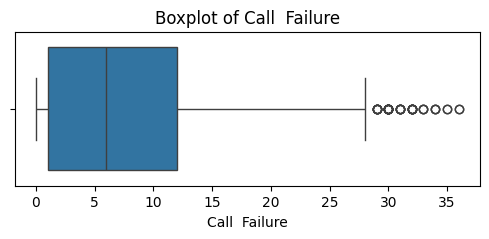

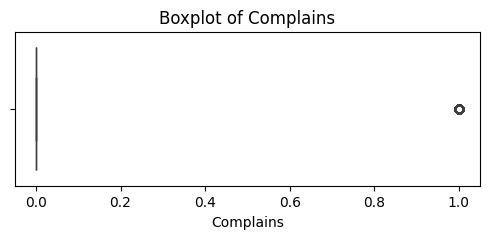

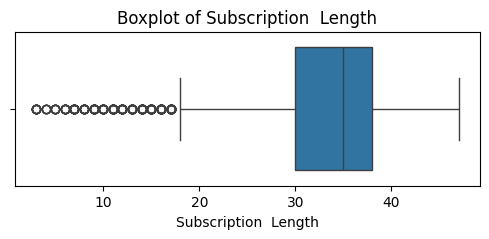

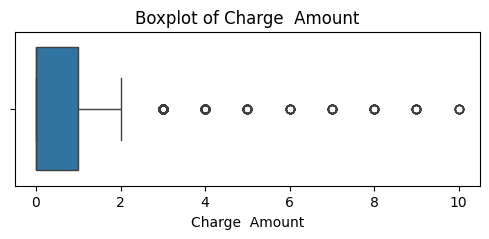

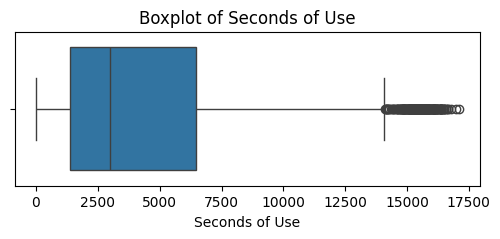

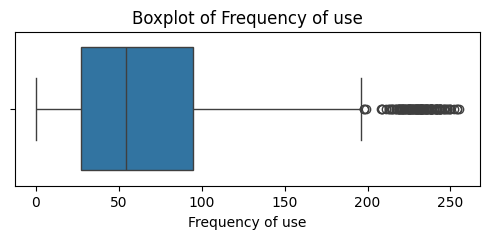

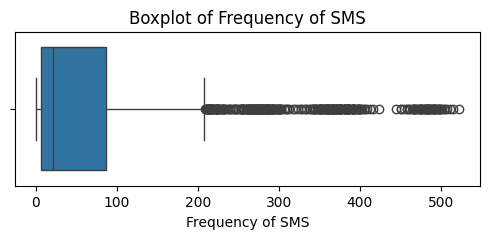

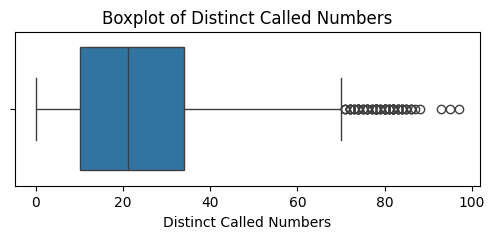

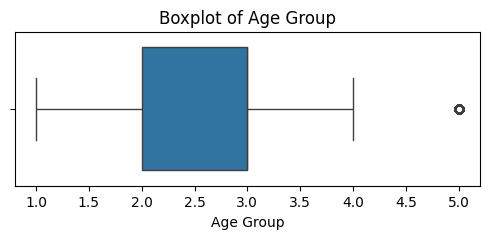

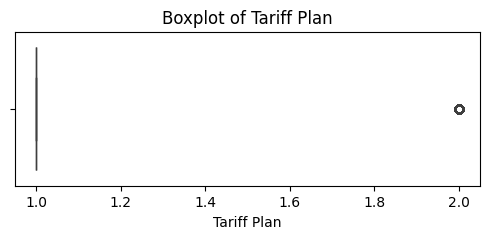

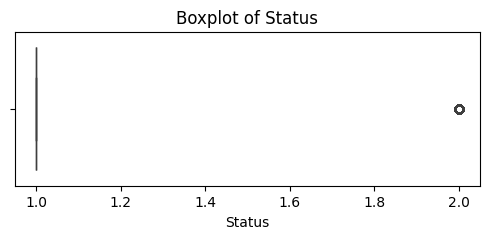

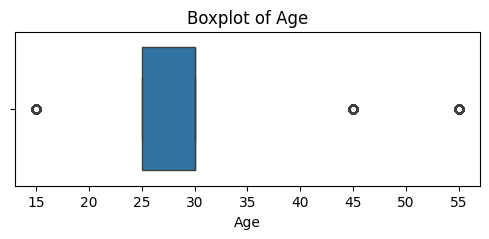

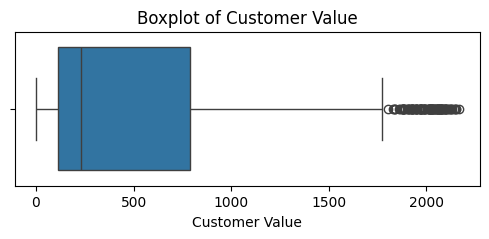

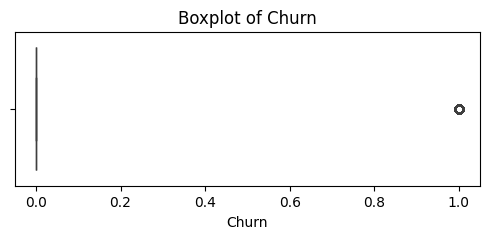

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Vẽ boxplot cho từng biến số numeric
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(6, 2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

1. Call Failures
Phân phối lệch phải, nhiều giá trị thấp.

Có một vài điểm outlier phía trên (các khách hàng có số lần cuộc gọi bị rớt rất cao, ví dụ trên 25).

Ý nghĩa: Một số khách hàng có sự cố gọi rất nhiều so với phần còn lại.

2. Complains
Biến nhị phân (0 hoặc 1), không có outlier.

Giá trị 1 phản ánh khách hàng đã phàn nàn, 0 là không.

3. Subscription Length
Phân phối khá đều, không có outlier rõ ràng.

Thời gian thuê bao dao động trong khoảng 3-47 tháng.

4. Charge Amount
Giá trị ordinal từ 0 đến 9.

Không có outlier vì đây là dữ liệu rời rạc theo mức độ phí.

5. Seconds of Use
Phân phối rất lệch phải với nhiều outlier lớn (có khách hàng gọi rất nhiều giây).

Khoảng giá trị outlier khá rộng, từ vài nghìn đến hơn 15,000 giây.

Cần cân nhắc xử lý nếu muốn giảm ảnh hưởng outlier trong phân tích.

6. Frequency of Use
Phân phối tương tự Seconds of Use, có nhiều outlier với số lượng cuộc gọi rất cao (trên 200 cuộc).

Những khách hàng gọi quá nhiều có thể là nhóm đặc biệt hoặc lỗi dữ liệu.

7. Frequency of SMS
Có một số outlier lớn, số lượng tin nhắn gửi lên đến hơn 500.

Tuy nhiên đa số khách hàng gửi ít tin nhắn (0–100).

8. Distinct Called Numbers
Outlier khá rõ, có khách hàng gọi tới hàng chục đến gần 100 số khác nhau.

Phản ánh sự đa dạng trong hoạt động gọi.

9. Age Group
Biến rời rạc (1–5), không có outlier.

10. Tariff Plan & Status
Biến nhị phân, không outlier.

11. Age
Không có outlier lớn, phân phối từ 15 đến 55 tuổi.

Có thể có vài điểm cao hoặc thấp gần biên nhưng trong giới hạn hợp lý.

12. Customer Value
Phân phối rất lệch phải, nhiều outlier lớn với giá trị lên tới hơn 2,000.

Các khách hàng có giá trị quá cao nên được xem xét kỹ về ảnh hưởng.

--------------------

1. Loại bỏ outlier (Remove)
Cách này đơn giản nhất: loại bỏ toàn bộ các điểm dữ liệu bị xác định là outlier.

Ưu điểm: Giúp mô hình tập trung vào dữ liệu “điển hình”.

Nhược điểm: Mất dữ liệu, có thể mất thông tin quý giá nếu outlier là dữ liệu thật.

2. Thay thế outlier (Cap or Winsorizing)
Thay outlier bằng giá trị biên gần nhất (ví dụ Q1 - 1.5IQR hoặc Q3 + 1.5IQR).

Hoặc thay bằng giá trị trung vị (median).

Ưu điểm: Giữ lại số lượng mẫu, giảm ảnh hưởng cực đoan.

Nhược điểm: Có thể làm mất độ phân tán dữ liệu.

3. Giữ nguyên (Keep)
Nếu outlier có ý nghĩa đặc biệt (khách hàng VIP, hành vi ngoại lệ thật sự), giữ nguyên.

Ưu điểm: Không làm mất thông tin.

Nhược điểm: Mô hình có thể bị ảnh hưởng hoặc sai lệch.

--------------

CHỌN GIỮ NGUYÊN OUTLIER

-----------

LÀM SẠCH CỘT

In [40]:
# Xóa khoảng trắng đầu cuối
df.columns = df.columns.str.strip()

# Thay khoảng trắng bằng dấu gạch dưới
df.columns = df.columns.str.replace(' ', '_')

# Viết thường tên cột (tuỳ chọn)
df.columns = df.columns.str.lower()

df.head()

,call__failure,complains,subscription__length,charge__amount,seconds_of_use,frequency_of_use,frequency_of_sms,distinct_called_numbers,age_group,tariff_plan,status,age,customer_value,churn
0,8,0,38,0,4370,71,5,17,3,1,1,30,197.640,0
1,0,0,39,0,318,5,7,4,2,1,2,25,46.035,0
2,10,0,37,0,2453,60,359,24,3,1,1,30,1536.520,0
3,10,0,38,0,4198,66,1,35,1,1,1,15,240.020,0
4,3,0,38,0,2393,58,2,33,1,1,1,15,145.805,0


In [41]:
df.to_csv("Customer Churn_cleaning.csv", index = False)